In [ ]:
Australian_Data_Mod.xlsx

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from pathlib import Path

%matplotlib inline


In [2]:
data = Path("C:/Users/Nick Hugh/Repos/Project 3/Nick Hugh Data/Australian_Data_Mod.xlsx")
source_df = pd.read_excel(data, index_col="date", parse_dates=True)
# source_df

In [3]:
source_df['ASX Small Ords Accum (Ex 100)'] = source_df['ASX Small Ords Accum (Ex 100)'].pct_change()  
source_df['Energy'] = source_df['Energy'].pct_change()  
source_df['Materials'] = source_df['Materials'].pct_change()   
source_df['Telecomm Services'] = source_df['Telecomm Services'].pct_change()  
source_df['S&P/ASX 200(TR)m'] = source_df['S&P/ASX 200(TR)m'].pct_change()   
source_df['Property Trusts'] = source_df['Property Trusts'].pct_change()   
source_df['Capital Goods'] = source_df['Capital Goods'].pct_change()   

# source_df

In [4]:
source_df = source_df.dropna()
source_df.columns

Index(['ASX Small Ords Accum (Ex 100)', 'Energy', 'Materials',
       'Telecomm Services', 'S&P/ASX 200(TR)m', 'Property Trusts',
       'Capital Goods', 'AU NAB Business Confidence',
       'AU NAB Business Conditions', 'AU NAB Trading Conditions',
       'AU NAB Profitability', 'Aus NAB Employment', 'AU NAB Forward Orders',
       'AU NAB Stocks', 'AU NAB Labour Costs',
       'AU NAB Price of Final Products', 'Aus Employed - Unemployment Rate',
       'AU NAB Capacity Utilisation', 'Aus AW Hours', 'Aus Real GDP mom%',
       'Aus Nominal GDP mom%',
       'Aus Gross Operating Surplus-Private Non financial mom%',
       'Aus Non farm unit labour costs', 'Aus Wages share % GDP',
       'Aus Rates of Pay Private Sector mom%',
       'Aus Westpac-MI Consumer Sentiment Index',
       'Aus Change in inventories Private real % GDP',
       'Aus non Farm GDP real mom%', 'Aust Real Retail Turnover - Total mom%',
       'Aus CPI All Groups', 'Aus CPI All Groups ex volatile items',
       'Aus

In [5]:
# source_df.columns

In [6]:
y = source_df[['Energy', 'Materials','Telecomm Services']]
y


,Energy,Materials,Telecomm Services
date,,,
2000-03-31,0.032393,0.036486,0.033157
2000-04-30,0.030626,0.035538,-0.102991
2000-05-31,0.197696,-0.013241,-0.101981
2000-06-30,0.041103,0.118688,0.008445
2000-07-31,-0.003734,-0.026677,0.028783
...,...,...,...
2022-02-28,0.085746,0.051654,-0.021885
2022-03-31,0.097534,0.088795,0.050997
2022-04-30,0.025210,-0.043322,-0.003230


In [7]:
y.describe()

,Energy,Materials,Telecomm Services
count,268.000000,268.000000,268.000000
mean,0.009310,0.010599,0.003100
std,0.066372,0.057077,0.049083
min,-0.375299,-0.227355,-0.146576
25%,-0.022561,-0.023850,-0.026925
50%,0.011456,0.010315,0.004041
75%,0.045313,0.048819,0.038463
max,0.284530,0.144698,0.136368


In [8]:
X = source_df
# X = X.drop(columns=['ASX Small Ords Accum (Ex 100)', 'Energy', 'Materials','Telecomm Services', 'S&P/ASX 200(TR)m', 'Property Trusts', 'Capital Goods'])
# X = X[['AU NAB Business Confidence','AU NAB Business Conditions', 'AU NAB Trading Conditions', 'AU NAB Profitability', 
#        'Aus NAB Employment', 'AU NAB Forward Orders', 'AU NAB Stocks', 'AU NAB Labour Costs', 'AU NAB Price of Final Products',
#        'AU NAB Capacity Utilisation']]

X = X[['Aus Employed - Unemployment Rate', 'Aus CPI All Groups','Aus Terms of Trade',
               'Aus Total Assets to Disposable Income','Aust Underemployment rate','Aus Real GDP mom%','Aus Nominal GDP mom%']]

# X = df[x_variables]y_SPASX_Energy = df[‘S&P/ASX 200 - Energy Returns’].dropna()
# y_SPASX_Materials = df[‘S&P/ASX 200 - Materials Returns’].dropna()
# y_SPASX_Telecommunication = df[‘S&P/ASX 200 - Telecommunication Returns’].dropna()


X

,Aus Employed - Unemployment Rate,Aus CPI All Groups,Aus Terms of Trade,Aus Total Assets to Disposable Income,Aust Underemployment rate,Aus Real GDP mom%,Aus Nominal GDP mom%
date,,,,,,,
2000-03-31,6.56,2.80,55.30,662.90,5.74,0.136509,1.023948
2000-04-30,6.38,2.90,55.00,664.52,5.92,0.303085,0.398187
2000-05-31,6.41,3.00,54.70,666.18,6.41,0.312245,0.409827
2000-06-30,6.11,3.10,54.40,667.80,5.93,0.301228,0.394989
2000-07-31,5.95,4.11,54.64,663.52,5.70,0.093540,0.837095
...,...,...,...,...,...,...,...
2022-02-28,4.01,4.65,109.94,1140.73,6.50,0.135983,1.246100
2022-03-31,3.92,5.20,112.90,1139.90,6.33,0.150346,1.362633
2022-04-30,3.87,5.53,114.68,1124.80,6.19,0.287909,1.346359


In [9]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [10]:
# Create scaler instance
X_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Create a sequential neural network model
neuron = Sequential()

In [12]:
# Add the input and the hidden layer to the model
number_inputs = len(X.columns)
number_hidden_nodes = len(X.columns)

neuron.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

In [13]:
number_inputs

7

In [14]:
# Second hidden layer
neuron.add(Dense(units=number_hidden_nodes, activation="relu"))

In [15]:
# Add the output layer

number_classes = len(y.columns)

neuron.add(Dense(units=number_classes, activation="sigmoid"))

number_classes


3

In [16]:
# Display model summary
neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 3)                 24        
                                                                 
Total params: 136 (544.00 Byte)
Trainable params: 136 (544.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
from tensorflow.keras.losses import mean_squared_error

# neuron.compile(loss=mean_squared_error, optimizer='sgd') #, metrics=["accuracy"])
neuron.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse","mae"])


In [18]:
# Fitting the model
model = neuron.fit(X_train_scaled, y_train, epochs=100)

# neuron.predict

Epoch 1/100
7/7 [==============================] - 1s 5ms/step - loss: 0.2882 - mse: 0.2882 - mae: 0.5230
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2779 - mse: 0.2779 - mae: 0.5137
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.2684 - mse: 0.2684 - mae: 0.5049
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.2594 - mse: 0.2594 - mae: 0.4963
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2504 - mse: 0.2504 - mae: 0.4876
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.2426 - mse: 0.2426 - mae: 0.4799
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2345 - mse: 0.2345 - mae: 0.4715
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2274 - mse: 0.2274 - mae: 0.4639
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.2202 - mse: 0.2202 - mae: 0.4560
Epoch 10/100
7/7 [============================

In [25]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

In [26]:
df

,loss,mse,mae
1,0.288152,0.288152,0.522999
2,0.277907,0.277907,0.513695
3,0.268402,0.268402,0.504874
4,0.259387,0.259387,0.496277
5,0.250382,0.250382,0.487637
...,...,...,...
96,0.005726,0.005726,0.056067
97,0.005628,0.005628,0.055575
98,0.005519,0.005519,0.055047
99,0.005422,0.005422,0.054581


<Axes: >

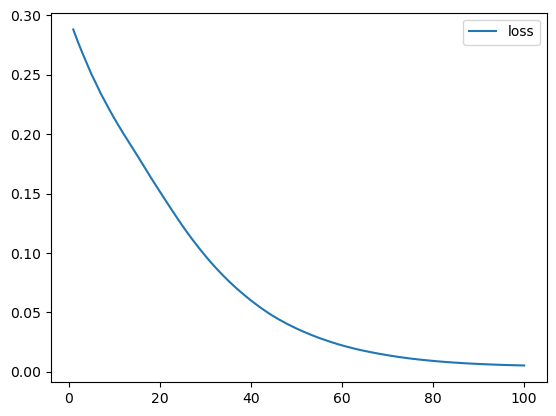

In [21]:
# Plot the loss
df.plot(y="loss")

In [22]:
model_history = model.history
model_history.keys()

dict_keys(['loss', 'mse', 'mae'])

<Axes: >

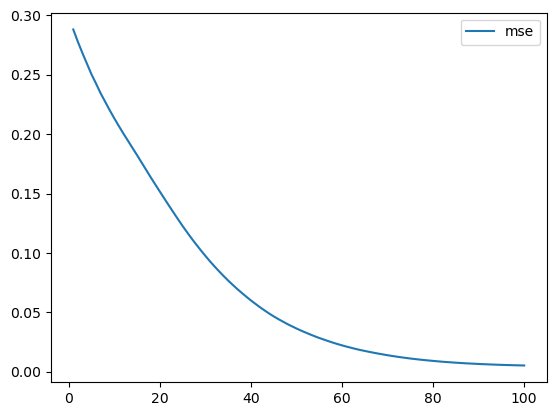

In [23]:
# Plot the mse
df.plot(y="mse")

<Axes: >

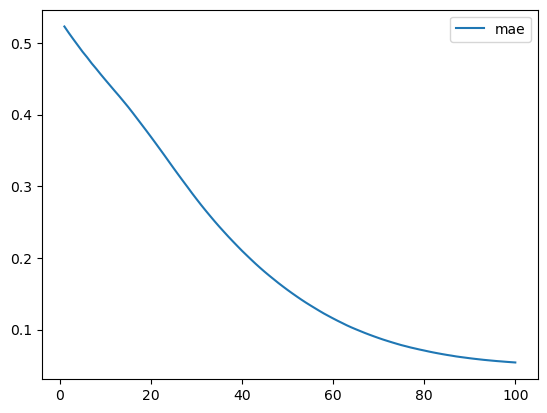

In [27]:
# Plot the mse
df.plot(y="mae")

In [28]:
# Evaluate the model using testing data
# model_loss, model_accuracy = neuron.evaluate(X_test_scaled, y_test, verbose=2)

# # Display evaluation results
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# yhat = model.predict(X_train_scaled)
# yhat = model.predict(X_test_scaled)